In [1]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Preprocessing
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Models ML
from sklearn.svm import SVC
#Metrics
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [2]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
row,col = data.shape
print("No of row = ",row)
print("No of col = ",col)


No of row =  768
No of col =  9


In [4]:
# There is not NaN or null values in columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
select_col = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [9]:
# Since these values cannot be 0 we calculate mean value and median value and place suitable value in dataset

select_col_df = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]
select_col_df = select_col_df.describe()
select_col_df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
count,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578
std,31.972618,19.355807,15.952218,115.244002,7.884160
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000
50%,117.000000,72.000000,23.000000,30.500000,32.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000
max,199.000000,122.000000,99.000000,846.000000,67.100000


In [10]:
# prints out 2nd index value as per row

mean_value = select_col_df.iloc[1:2,:]
mean_value

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
mean,120.894531,69.105469,20.536458,79.799479,31.992578


In [14]:
# manually calculating median values

# data['Glucose'] = data['Glucose'].replace(0, data['Glucose'].median())
# data['BloodPressure'] = data['BloodPressure'].replace(0, data['BloodPressure'].median())
# data['SkinThickness'] = data['SkinThickness'].replace(0, data['SkinThickness'].median())
# data['Insulin'] = data['Insulin'].replace(0, data['Insulin'].median())
# data['BMI'] = data['BMI'].replace(0, data['BMI'].median())

In [13]:
# Replacing the values equal to 0 by the median. Automating for calculating median of these values

select_col = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in data[select_col]:
    data.loc[:,col].replace(0, data.loc[:,col].median(), inplace=True)
    print(col,data.loc[:,col].median())

Glucose 117.0
BloodPressure 72.0
SkinThickness 23.0
Insulin 31.25
BMI 32.0


In [15]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#Calculate the no of different classes

In [16]:
data['Outcome'].value_counts()

# It shows that the Outcome is imbalanced. We need to balance out the output.

0    500
1    268
Name: Outcome, dtype: int64

In [17]:
yes = data[data['Outcome'] == 1]
no = data[data['Outcome'] == 0].iloc[0:268]  # out of 500 we only take 268 value of outcome 0(negative) to balance the value

data = pd.concat([yes,no], axis = 0).sample(frac = 1)  # to randomize and take 100% data the Outcome value we use sample(frac = 1)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
226,0,101,76,23,30.5,35.7,0.198,26,0
757,0,123,72,23,30.5,36.3,0.258,52,1
485,0,135,68,42,250.0,42.3,0.365,24,1
47,2,71,70,27,30.5,28.0,0.586,22,0
732,2,174,88,37,120.0,44.5,0.646,24,1
...,...,...,...,...,...,...,...,...,...
540,8,100,74,40,215.0,39.4,0.661,43,1
299,8,112,72,23,30.5,23.6,0.840,58,0
411,1,112,72,30,176.0,34.4,0.528,25,0
151,4,114,65,23,30.5,21.9,0.432,37,0


In [18]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000
mean,4.046642,126.688433,72.878731,27.791045,100.217351,33.087500,0.494119,33.835821,0.500000
std,3.441863,31.496654,11.959520,9.515025,115.010275,6.965805,0.348858,11.348148,0.500467
min,0.000000,44.000000,30.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,103.000000,66.000000,23.000000,30.500000,28.375000,0.254000,24.750000,0.000000
50%,3.000000,122.000000,72.000000,23.000000,31.250000,32.750000,0.389000,31.000000,0.500000
75%,6.000000,147.000000,80.000000,33.000000,135.000000,37.025000,0.656250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,70.000000,1.000000


In [20]:
# Removing dependent variable(Outcome) from dataset.

# data1 = data.iloc[: ,:-1]
# data1

In [21]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.114070,0.178685,0.031975,-0.036391,0.025245,-0.042092,0.545457,0.238184
Glucose,0.114070,1.000000,0.174993,0.168841,0.359931,0.238153,0.129630,0.272474,0.490738
BloodPressure,0.178685,0.174993,1.000000,0.127125,-0.023941,0.287891,-0.020455,0.310268,0.187842
SkinThickness,0.031975,0.168841,0.127125,1.000000,0.254564,0.538910,0.176217,0.051648,0.202540
Insulin,-0.036391,0.359931,-0.023941,0.254564,1.000000,0.174026,0.183122,0.021738,0.137714
BMI,0.025245,0.238153,0.287891,0.538910,0.174026,1.000000,0.152524,0.041018,0.329608
DiabetesPedigreeFunction,-0.042092,0.129630,-0.020455,0.176217,0.183122,0.152524,1.000000,0.011150,0.161766
Age,0.545457,0.272474,0.310268,0.051648,0.021738,0.041018,0.011150,1.000000,0.285012
Outcome,0.238184,0.490738,0.187842,0.202540,0.137714,0.329608,0.161766,0.285012,1.000000


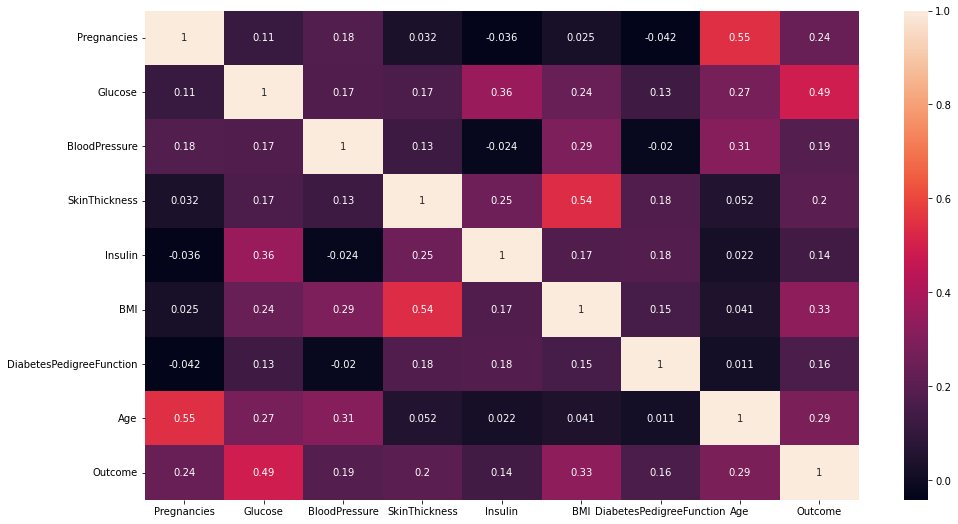

In [22]:
plt.figure(figsize=(16,9))
corr = data.corr()
sns.heatmap(corr, annot=True)
plt.show()


In [23]:
# training and normalization of data

X = data.iloc[:,:8] # independent variable
Y = data.iloc[:,8:] # dependent variable

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state=1)

In [24]:
from sklearn.svm import SVC
svc= SVC()
svc.fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [25]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
426,0,94,72,23,30.5,32.0,0.256,25
712,10,129,62,36,30.5,41.2,0.441,38
39,4,111,72,47,207.0,37.1,1.390,56
113,4,76,62,23,30.5,34.0,0.391,25
595,0,188,82,14,185.0,32.0,0.682,22
...,...,...,...,...,...,...,...,...
275,2,100,70,52,57.0,40.5,0.677,25
46,1,146,56,23,30.5,29.7,0.564,29
54,7,150,66,42,342.0,34.7,0.718,42
326,1,122,64,32,156.0,35.1,0.692,30


In [26]:
Y_test

,Outcome
426,0
712,1
39,1
113,0
595,1
...,...
275,0
46,0
54,0
326,1


In [27]:
# Predicting X_test and comparing accuracy of X_test with Y_test

Y_pred = svc.predict(X_test)
Y_pred

array([0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0],
      dtype=int64)

In [28]:
#test accu
svc_accuracy= round(accuracy_score(Y_test,Y_pred),4)*100 # Accuracy
svc_accuracy

71.3

In [29]:
#train accu
Y_pred = svc.predict(X_train)
svc_accuracy1= round(accuracy_score(Y_train,Y_pred),4)*100 # Accuracy
svc_accuracy1

72.89999999999999

In [30]:
d = X_test.iloc[0:1]
d

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
426,0,94,72,23,30.5,32.0,0.256,25


In [31]:
Y_test.iloc[0:1]

,Outcome
426,0


In [32]:
Y_pred = svc.predict(X_test.iloc[0:1])
Y_pred

array([0], dtype=int64)

In [33]:
Pregnancies = float(input("Enter Pregnancies = "))
Glucose = float(input("Enter Glucose = "))
BloodPressure = float(input("Enter BloodPressure = "))
SkinThickness = float(input("Enter SkinThickness = "))
Insulin = float(input("Enter Insulin = "))
BMI = float(input("Enter BMI = "))
DiabetesPedigreeFunction = float(input("Enter DiabetesPedigreeFunction = "))
Age = float(input("Enter Age = "))

new_data = {'Pregnancies':[Pregnancies],
            'Glucose':[Glucose],
            'BloodPressure':[BloodPressure],
            'SkinThickness':[SkinThickness],
            'Insulin':[Insulin],
            'BMI':[BMI],
            'DiabetesPedigreeFunction':[DiabetesPedigreeFunction],
            'Age':[Age]
            }
d = pd.DataFrame(new_data)

Enter Pregnancies = 1
Enter Glucose = 122
Enter BloodPressure = 90
Enter SkinThickness = 34
Enter Insulin = 44
Enter BMI = 32
Enter DiabetesPedigreeFunction = 0.5
Enter Age = 23


In [34]:
d

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.0,122.0,90.0,34.0,44.0,32.0,0.5,23.0


In [35]:
Y_score = svc.predict(d)
print(Y_score)

[0]


yes 56
No 52


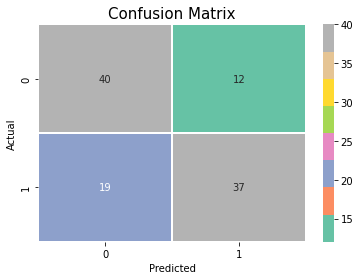

In [39]:
# CONFUSION MATRIX

Y_pred = svc.predict(X_test)

cm=confusion_matrix(Y_test,Y_pred)
class_label = [0, 1]
print("yes",len(Y_test[Y_test['Outcome'] == True]))
print("No",len(Y_test[Y_test['Outcome'] == False]))

df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
df_cm
sns.heatmap(df_cm,annot=True,cmap='Set2',linewidths=2,fmt='d')
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [40]:
# CLASSIFICATION REPORT

report=classification_report(Y_test,Y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.68      0.77      0.72        52
           1       0.76      0.66      0.70        56

    accuracy                           0.71       108
   macro avg       0.72      0.71      0.71       108
weighted avg       0.72      0.71      0.71       108

